In [131]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA
%matplotlib notebook

from asteria.simulation import Simulation
import astropy.units as u

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('font', size=16)

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [13]:
dt = 0.1*u.ms # highest frequency in Tamborra 2014 model

model = {'name': 'Tamborra_2014',
         'param':{
             'progenitor_mass': 20*u.Msun,
             'direction': 1}
        }
sim = Simulation(model=model,
                 distance=10* u.kpc, 
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0.006*u.s, tmax=0.338*u.s, dt=dt,
                 hierarchy = 'normal',
                 mixing_scheme = 'NoTransformation',
                 geomscope = 'Gen2')
sim.run()

In [14]:
doms = sim.detector._doms_table
doms

str,i,x,y,z,det_type,om_type,effvol
int32,int32,float64,float64,float64,str4,str2,float64
1,1,-256.14,-521.08,496.03,IC86,i3,0.13923377077601468
1,2,-256.14,-521.08,479.01,IC86,i3,0.152500481105646
1,3,-256.14,-521.08,461.99,IC86,i3,0.16807808408662567
1,4,-256.14,-521.08,444.97,IC86,i3,0.17399284086829436
1,5,-256.14,-521.08,427.95,IC86,i3,0.16970448115728468
1,6,-256.14,-521.08,410.93,IC86,i3,0.14982390744143856
...,...,...,...,...,...,...,...
1122,74,290.0,600.0,-638.85,Gen2,md,0.38931459666615464
1122,75,290.0,600.0,-655.87,Gen2,md,0.6047131015749686


Plot the x-y projection

<IPython.core.display.Javascript object>


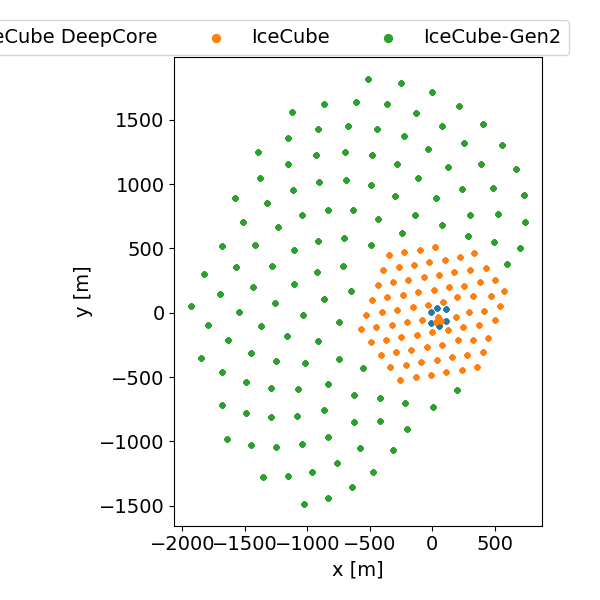

/tmp/ipykernel_38563/1678545375.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


In [20]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Plot the DeepCore DOMs
dc = doms['om_type'] == 'dc'
x, y, z = [doms[coord][dc] for coord in 'xyz']
ax.scatter(x, y, alpha=0.5, s=8, label = 'IceCube DeepCore')

# Plot the standard DOMs
i3 = doms['om_type'] == 'i3'
x, y, z = [doms[coord][i3] for coord in 'xyz']
ax.scatter(x, y, alpha=0.5, s=8, label = 'IceCube')

# Plot the standard DOMs
md = doms['om_type'] == 'md'
x, y, z = [doms[coord][md] for coord in 'xyz']
ax.scatter(x, y, alpha=0.5, s=8, label = 'IceCube-Gen2')

ax.set(xlabel='x [m]', ylabel='y [m]')
leg = ax.legend(ncols = 3, bbox_to_anchor=(1.1, 1.1), markerscale = 2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

fig.tight_layout()
plt.savefig('./plots/geometry_xy.pdf', dpi = 300)

Plot the x-z projection.

<IPython.core.display.Javascript object>


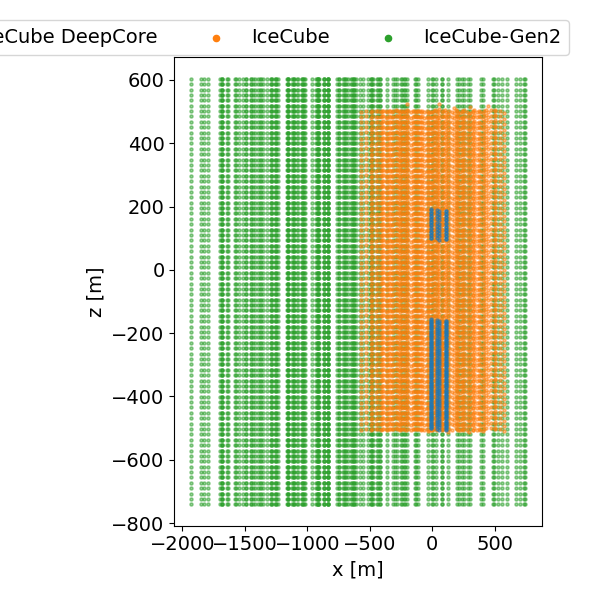

/tmp/ipykernel_38563/3333864137.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


In [90]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

# Plot the DeepCore DOMs
dc = doms['om_type'] == 'dc'
x, y, z = [doms[coord][dc] for coord in 'xyz']
ax.scatter(x, z, alpha=0.5, s=5, label = 'IceCube DeepCore', zorder = 2)

# Plot the standard DOMs
i3 = doms['om_type'] == 'i3'
x, y, z = [doms[coord][i3] for coord in 'xyz']
ax.scatter(x, z, alpha=0.5, s=5, label = 'IceCube', zorder = 1)

# Plot the standard DOMs
md = doms['om_type'] == 'md'
x, y, z = [doms[coord][md] for coord in 'xyz']
ax.scatter(x, z, alpha=0.5, s=5, label = 'IceCube-Gen2', zorder = 0)

ax.set(xlabel='x [m]', ylabel='z [m]')
leg = ax.legend(ncols = 3, bbox_to_anchor=(1.1, 1.1), markerscale=2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
fig.tight_layout()
plt.savefig('./plots/geometry_xz.pdf', dpi = 300)

Plot the 3d projection.

<IPython.core.display.Javascript object>


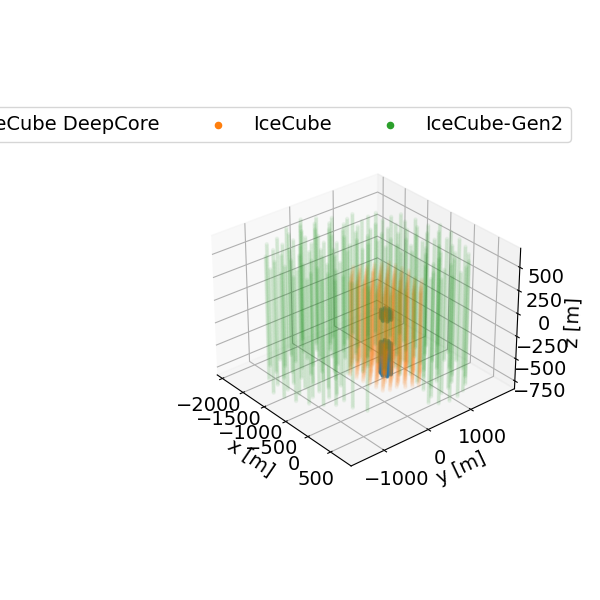

/tmp/ipykernel_38563/461103554.py:22: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11
/tmp/ipykernel_38563/461103554.py:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


In [89]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the DeepCore DOMs
dc = doms['om_type'] == 'dc'
x, y, z = [doms[coord][dc] for coord in 'xyz']
ax.scatter(x, y, z, alpha=0.5, s=5, label = 'IceCube DeepCore', zorder = 2)

# Plot the standard DOMs
i3 = doms['om_type'] == 'i3'
x, y, z = [doms[coord][i3] for coord in 'xyz']
ax.scatter(x, y, z, alpha=0.05, s=5, label = 'IceCube', zorder = 1)

# Plot the standard DOMs
md = doms['om_type'] == 'md'
x, y, z = [doms[coord][md] for coord in 'xyz']
ax.scatter(x, y, z, alpha=0.05, s=5, label = 'IceCube-Gen2', zorder = 0)

ax.set(xlabel='x [m]', ylabel='y [m]', zlabel='z [m]')

ax.view_init(30, -40)
ax.dist = 11
leg = ax.legend(ncols = 3, bbox_to_anchor=(1.1, 1.1), markerscale = 2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

fig.tight_layout()
plt.savefig('./plots/geometry_3d.pdf', dpi = 300)

<IPython.core.display.Javascript object>


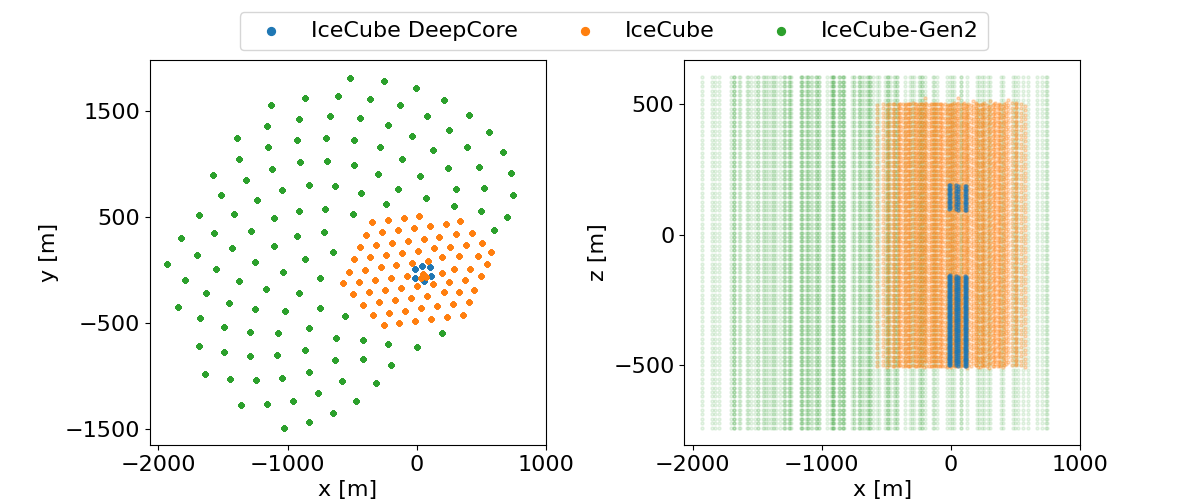

In [134]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.subplots_adjust(wspace=0.35) 
# Plot the DeepCore DOMs
dc = doms['om_type'] == 'dc'
x, y, z = [doms[coord][dc] for coord in 'xyz']
ax[0].scatter(x, y, alpha=1, s=8, label = 'IceCube DeepCore')
ax[1].scatter(x, z, alpha=0.5, s=5, zorder = 5)


# Plot the standard DOMs
i3 = doms['om_type'] == 'i3'
x, y, z = [doms[coord][i3] for coord in 'xyz']
ax[0].scatter(x, y, alpha=1, s=8, label = 'IceCube')
ax[1].scatter(x, z, alpha=0.25, s=5, zorder = 2)

# Plot the standard DOMs
md = doms['om_type'] == 'md'
x, y, z = [doms[coord][md] for coord in 'xyz']
ax[0].scatter(x, y, alpha=1, s=8, label = 'IceCube-Gen2')
ax[1].scatter(x, z, alpha=0.1, s=5, zorder = 1)

ax[0].set(xlabel='x [m]', ylabel='y [m]')
ax[1].set(xlabel='x [m]', ylabel='z [m]')

ax[0].set_xticks([-2000,-1000,0,1000])
ax[1].set_xticks([-2000,-1000,0,1000])
ax[0].set_yticks([-1500,-500,500,1500])
ax[1].set_yticks([-500,0,500])

#for lh in ax[0].leg.legend_handles: 
#    lh.set_alpha(1)

#plt.tight_layout()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol = 3, loc = (0.2,0.9), markerscale = 2)

plt.savefig('./plots/geometry_xyxz.pdf', dpi = 300)

In [62]:
leg?

In [ ]:
leg.l